# All General Imports

In [2]:
import warnings
import numpy as np
import os
import platform
import timeit

# All Functions Definitions

In [3]:
def data_download(file_to_download, gdrive_code, OS):
  if not os.path.exists(file_to_download):
    os.system('gdown --id "'+gdrive_code+'" --output '+file_to_download)
    if OS == "Linux":
        os.system('unzip -o -n "./'+file_to_download+'" -d "./"')

# All Downloads

In [4]:
start_time = timeit.default_timer()
# Operating System
OS = platform.system()                           # returns 'Windows', 'Linux', etc

os.system('pip install --upgrade --no-cache-dir gdown')

data_download("./Garbage_Data_Set.zip", "1e0RJH5HLdRVmPnDaamQLn0WVYFz4gOrE", OS)

data_download("./Garbage_Libs.zip", "1ZoMU2QGYLKhIaGZS8y4IYvmHofeqvAMz", OS)

print("Elapsed Time: ", timeit.default_timer() - start_time)

Elapsed Time:  3.16042739500017


# All Imports

Keras imports and Program Imports

In [5]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD, Adam 
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau

from Preprocessing.preprocessing import LoadData
from Models.convnet import Lenet5
from Utils.view import View

# Initializations

Initialization of Globals, Hyperparameters, Dataset Parameters and Normalization


In [6]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=Warning)

default_callbacks = []

labels_garbage_list = ["glass", "metal", "paper", "plastic", "trash"]

learning_rate = 0.001
epochs = 100
limit = None
batch_size = 32
normalization = True
data_augmentation = False
save_best_model = True
early_stopping = False
log = True
R_LR_P = False

cifar10_ds = False
garbage_ds = True
develop = False
dest_input_size = 32

if develop: 
    limit = 1000
    epochs = 10

if cifar10_ds: 
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    input_size = x_train.shape[1]
    depth = x_train.shape[3]
    classes = len(np.unique(y_train))
    
if garbage_ds:
    [x_train, y_train, x_val, y_val, x_test, y_test] = LoadData.load_dataset_cv('./Garbage_Data_Set', labels_garbage_list, 0.1, 0.1, True, limit, dest_input_size, True)
    input_size = x_train.shape[1]
    depth = x_train.shape[3]
    classes = len(np.unique(y_train))

if cifar10_ds and limit is not None: 
    x_train = x_train[0:limit]
    y_train = y_train[0:limit]
    x_test = x_test[0:limit]
    y_test = y_test[0:limit]
    
if normalization: 
    x_train = x_train / 255.0
    x_test = x_test / 255.0 



Loading time: 0.10 minutes



In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)



(1700, 32, 32, 3)
(1700,)
(212, 32, 32, 3)
(212,)
(212, 32, 32, 3)
(212,)


# Model Compiling

One-hot encoding of the output


In [8]:
if cifar10_ds or garbage_ds: 
    y_train = to_categorical(y_train, num_classes = classes)
    y_val = to_categorical(y_val, num_classes = classes)
    y_test = to_categorical(y_test, num_classes = classes)

model = Lenet5.build(depth, input_size, input_size, classes, True)
#sgd = SGD(lr = learning_rate)
sgd = Adam(lr = learning_rate)

model.compile(optimizer = sgd, loss = "categorical_crossentropy", metrics = ["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 20)        1520      
                                                                 
 activation (Activation)     (None, 32, 32, 20)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 50)        25050     
                                                                 
 activation_1 (Activation)   (None, 16, 16, 50)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 50)         0         
 2D)                                                    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Callback Definitions

Save Best Model, Early Stopping, Csv Logger and Reduce On Plateau

In [9]:
if save_best_model: 
  check_point = ModelCheckpoint("best_epoch_model.hdf5", save_weights_only = True, monitor = "val_accuracy", verbose = 1, save_best_only = True, mode = "max")
  default_callbacks = default_callbacks + [check_point]

if early_stopping: 
  earlyStopping = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 0, mode = 'min') 
  default_callbacks = default_callbacks + [earlyStopping]

if log: 
  csv_logger = CSVLogger('history.log')
  default_callbacks = default_callbacks + [csv_logger]

if R_LR_P: 
  reduce_lr_plateau = ReduceLROnPlateau(factor=0.1, patience=3, verbose=1, min_lr=1e-06, min_delta=0.01)
  default_callbacks = default_callbacks + [reduce_lr_plateau]


# Model Training

Train the model, iterating on the data in batches

Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.28774, saving model to best_epoch_model.hdf5
54/54 - 3s - loss: 1.5125 - accuracy: 0.3047 - val_loss: 59.5284 - val_accuracy: 0.2877 - 3s/epoch - 47ms/step
Epoch 2/100

Epoch 2: val_accuracy improved from 0.28774 to 0.43396, saving model to best_epoch_model.hdf5
54/54 - 0s - loss: 1.3998 - accuracy: 0.3724 - val_loss: 86.2607 - val_accuracy: 0.4340 - 464ms/epoch - 9ms/step
Epoch 3/100

Epoch 3: val_accuracy did not improve from 0.43396
54/54 - 0s - loss: 1.3316 - accuracy: 0.4094 - val_loss: 111.8888 - val_accuracy: 0.4151 - 388ms/epoch - 7ms/step
Epoch 4/100

Epoch 4: val_accuracy improved from 0.43396 to 0.54717, saving model to best_epoch_model.hdf5
54/54 - 0s - loss: 1.2408 - accuracy: 0.4606 - val_loss: 101.5667 - val_accuracy: 0.5472 - 425ms/epoch - 8ms/step
Epoch 5/100

Epoch 5: val_accuracy did not improve from 0.54717
54/54 - 0s - loss: 1.2013 - accuracy: 0.4918 - val_loss: 133.6302 - val_accuracy: 0.5094 - 380ms/epoch

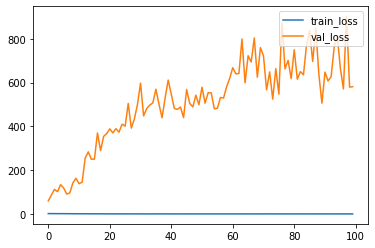

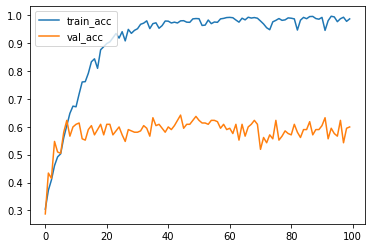

In [10]:
if data_augmentation == False: 
	history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val), callbacks = default_callbacks, verbose = 2)
else:
	datagen = ImageDataGenerator(zoom_range = 0.2, horizontal_flip = True, vertical_flip = True, rotation_range = 30)                                   

	history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), steps_per_epoch = x_train.shape[0]/batch_size, epochs = epochs, validation_data = (x_val, y_val), callbacks = default_callbacks, verbose = 2)

score = model.evaluate(x_test, y_test, batch_size=64)
print(score)

model.save_weights('last_epoch_model.hdf5')
    
View.plot_loss(history)
View.plot_acc(history)

# Homeworks

1) Implement the Garbage Classifier with advanced models that we saw last time and make practice in order to find the best model.

2) Make some exploratory analysis on Input Data.

3) Make some exploratory analysis on Output Data.

4) Find the best hyperparameters for Data Augmentation.

5) Try to manually fine-tune all hyper-parameters in order to achieve the best accuracy on validation set

6) Save the best model and write an Inference code, where you give one external garbage image (downloaded from google, etc.) and classify it with the best model.